In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.data.make_dataset import load_dossies_df
from src.data.make_metadados import load_dossies_metadados_df
from src.features.build_features import get_tfidf_features
from src.models import train_model, predict_model
from src.models.validate_model import checar_categoria
from src.visualization.visualize import plot_dendrogram_Agglomerative, plot_dendrogram

In [3]:
dossies = load_dossies_df()
len(dossies)

464

In [4]:
dossies.head()

,file,text
0,10.txt,produção limpa produção limpa construção civil...
1,100.txt,técnico curtimento rede tecnologia bahia técni...
2,101.txt,técnico instalação rede tecnologia bahia técni...
3,102.txt,técnico produção carvalho rede tecnologia bahi...
4,103.txt,técnico rede tecnologia bahia técnico tratamen...


In [5]:
dossies_metadados = load_dossies_metadados_df(dossies.file, ['titulo', 'palavras_chave', 'categoria'])
len(dossies_metadados)

464

In [6]:
dossies_metadados.head()

,titulo,palavras_chave,categoria
0,Produção mais limpa no setor de construção civil,"[Aproveitamento de resíduo, construção civil,...","[SBRT, ÁGUA,ESGOTO,GESTÃO DE RESÍDUOS, Coleta ..."
1,Curtimento de peles exóticas – peixes e rãs,"[Curtimento, couro, pele, peixe, rã]","[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Couros e C..."
2,Instalação de pomar,"[Agricultura, pomar]","[SBRT, AGRICULTURA E PECUÁRIA, Agricultura, Ho..."
3,Produção de licores,"[Bebida Alcoólica, licor]","[SBRT, INDÚSTRIAS DE TRANSFORMAÇÃO, Alimentos ..."
4,Preparação de viveiro – povoamento com camarões,"[Camarão, carcinicultura, pesca, viveiro]","[SBRT, PESCA E AQUICULTURA, Pesca]"


In [7]:
X = get_tfidf_features(dossies.text)
X.shape

(464, 4845)

In [8]:
aggl_clustering = train_model.agglomerative(X, distance_threshold=0, n_clusters=None, linkage='ward')
aggl_clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)

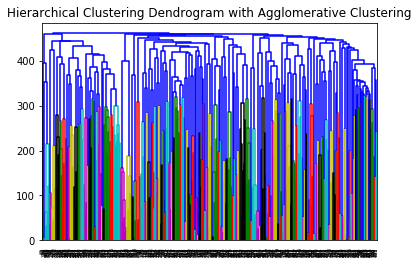

In [9]:
plot_dendrogram_Agglomerative(aggl_clustering)

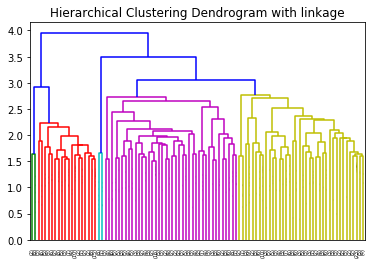

In [27]:
Z = train_model.linkage_matrix(X, method='ward')
plot_dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=100,  # show only the last p merged clusters
    leaf_rotation=90,
    # leaf_font_size=12.,
    show_contracted=True
)

In [28]:
n_clusters = 5
labels = predict_model.Z_labels(Z, t=n_clusters, criterion='maxclust')
labels

array([3, 4, 2, 5, 5, 5, 2, 5, 4, 5, 5, 2, 5, 4, 2, 2, 4, 4, 5, 2, 5, 5,
       4, 5, 4, 4, 5, 5, 2, 4, 4, 2, 4, 5, 4, 1, 2, 2, 4, 2, 5, 4, 4, 2,
       4, 5, 5, 5, 5, 5, 2, 2, 4, 1, 1, 4, 2, 1, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 5, 3, 4, 2, 5, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 5, 5, 4, 2, 5, 4,
       4, 2, 5, 5, 2, 5, 5, 4, 2, 5, 2, 2, 5, 5, 5, 5, 2, 5, 4, 4, 4, 4,
       4, 5, 4, 5, 5, 5, 4, 4, 4, 5, 4, 2, 5, 5, 2, 4, 5, 2, 4, 2, 4, 4,
       4, 5, 4, 5, 1, 5, 4, 2, 5, 4, 5, 2, 2, 5, 2, 4, 2, 4, 2, 4, 4, 4,
       3, 4, 3, 3, 5, 3, 2, 5, 2, 5, 5, 2, 2, 2, 4, 2, 4, 5, 4, 5, 2, 4,
       4, 4, 5, 4, 4, 4, 5, 4, 4, 5, 4, 3, 3, 5, 4, 5, 5, 5, 4, 4, 4, 4,
       5, 4, 4, 2, 5, 5, 2, 2, 5, 2, 2, 5, 2, 5, 2, 4, 5, 5, 2, 4, 5, 5,
       4, 4, 5, 5, 4, 4, 5, 5, 4, 5, 4, 2, 5, 5, 2, 4, 5, 5, 4, 4, 5, 5,
       5, 4, 2, 2, 5, 4, 5, 5, 5, 5, 4, 3, 5, 5, 2, 5, 3, 2, 4, 2, 5, 2,
       4, 4, 4, 5, 4, 5, 2, 2, 4, 2, 4, 5, 5, 4, 5, 5, 4, 2, 2, 2, 2, 2,
       5, 4, 1, 5, 4, 5, 4, 3, 4, 2, 2, 5, 5, 5, 4,

In [29]:
# Com os resultados dessa célula pode-se presumir que documentos com a label 2 está fortemente relacionado à questões de agricultura
checar_categoria(dossies_metadados, labels, 2)

array([list(['SBRT', 'AGRICULTURA E PECUÁRIA', 'Agricultura', 'Horticultura']),
       list(['SBRT', 'AGRICULTURA E PECUÁRIA', 'Agricultura', 'Fruticultura']),
       list(['SBRT', 'AGRICULTURA E PECUÁRIA', 'Agricultura', 'Atividades de apoio à agricultura']),
       list(['SBRT', 'AGRICULTURA E PECUÁRIA', 'Agricultura', 'Fruticultura']),
       list(['SBRT', 'AGRICULTURA E PECUÁRIA', 'Agricultura', 'Outras lavouras']),
       list(['SBRT', 'AGRICULTURA E PECUÁRIA', 'Agricultura', 'Floricultura']),
       list(['SBRT', 'AGRICULTURA E PECUÁRIA', 'Agricultura', 'Horticultura']),
       list(['SBRT', 'PRODUÇÃO FLORESTAL', 'Florestas Plantadas']),
       list(['SBRT', 'AGRICULTURA E PECUÁRIA', 'Agricultura', 'Fruticultura']),
       list(['SBRT', 'AGRICULTURA E PECUÁRIA', 'Agricultura', 'Fruticultura']),
       list(['SBRT', 'AGRICULTURA E PECUÁRIA', 'Agricultura', 'Outras lavouras']),
       list(['SBRT', 'AGRICULTURA E PECUÁRIA', 'Atividades de apoio à agricultura e pecuária', 'Atividade